In [45]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
df=pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [47]:
x=df[['Annual Income (k$)','Spending Score (1-100)']].values


In [48]:
inertia=[]
k_values=range(1,11)

for k in k_values:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

inertia    
    

[269981.28,
 183653.3289473684,
 106348.37306211119,
 73880.64496247195,
 44448.45544793371,
 40825.16946386947,
 33642.57922077922,
 26686.837785187785,
 24766.47160979344,
 23103.122085983916]

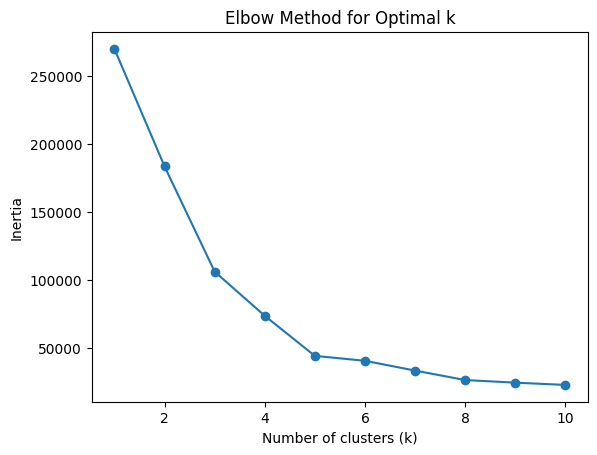

In [49]:
plt.plot(k_values,inertia,marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [50]:
optimal_k=5
kmeans=KMeans(n_clusters=optimal_k,random_state=42,n_init=10,max_iter=300)
df['Cluster']=kmeans.fit_predict(x)
y_kmeans=kmeans.fit_predict(x)
centroids=kmeans.cluster_centers_

In [51]:
silhouette_avg=silhouette_score(x,y_kmeans)
print(f'Silhouette Score for k={optimal_k}: {silhouette_avg}')

Silhouette Score for k=5: 0.553931997444648


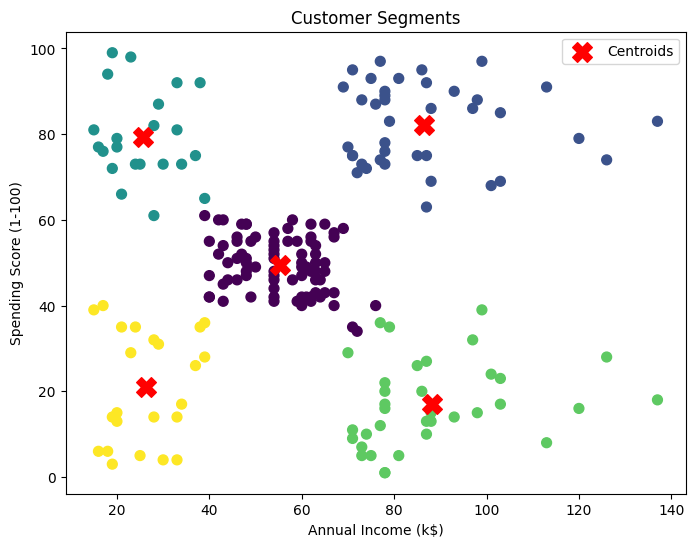

In [52]:
plt.figure(figsize=(8,6))
plt.scatter(x[:,0],x[:,1],c=y_kmeans,s=50,cmap='viridis')
plt.scatter(centroids[:,0],centroids[:,1],c='red',s=200,marker='X',label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.legend()
plt.show()

In [53]:
features = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X_boost = df[features]
y_boost = df['Cluster']

In [54]:
X_boost=pd.get_dummies(X_boost,columns=['Gender'],drop_first=True)
X_boost

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False
...,...,...,...,...
195,35,120,79,False
196,45,126,28,False
197,32,126,74,True
198,32,137,18,True


In [55]:
x_train,x_test,y_train,y_test=train_test_split(X_boost,y_boost,test_size=0.2,random_state=42)

In [56]:
gb=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42)
gb.fit(x_train,y_train)

,"loss loss: {'log_loss', 'exponential'}, default='log_loss'The loss function to be optimized. 'log_loss' refers to binomial andmultinomial deviance, the same as used in logistic regression.It is a good choice for classification with probabilistic outputs.For loss 'exponential', gradient boosting recovers the AdaBoost algorithm.",'log_loss'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.For an example of the effects of this parameter and its interaction with``subsample``, see:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_regularization.py`.",0.1
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",100
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are'friedman_mse' for the mean squared error with improvement score byFriedman, 'squared_error' for mean squared error. The default value of'friedman_mse' is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",3
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, 

In [57]:
y_pred=gb.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(f'Gradient Boosting Classifier Accuracy: {accuracy:.2f}')

Gradient Boosting Classifier Accuracy: 0.97


In [58]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [59]:
xgb_clf = xgb.XGBClassifier(
    objective='multi:softmax', 
    num_class=len(y_boost.unique()), 
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    use_label_encoder=False,
    eval_metric='mlogloss', 
    random_state=42
)

In [61]:
xgb_clf.fit(x_train, y_train)
y_pred_xgb = xgb_clf.predict(x_test)

c:\Users\vs vithun\Desktop\datapreprocessing\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [21:45:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [62]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Classifier Accuracy: {accuracy_xgb:.2f}')

XGBoost Classifier Accuracy: 0.95


In [63]:
from catboost import CatBoostClassifier
cat_clf = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=3,
    loss_function='MultiClass',
    random_seed=42,
    verbose=0
)

In [64]:
cat_clf.fit(x_train, y_train)
y_pred_cat = cat_clf.predict(x_test)
accuracy_cat = accuracy_score(y_test, y_pred_cat)
print(f'CatBoost Classifier Accuracy: {accuracy_cat:.2f}')

CatBoost Classifier Accuracy: 0.95
